<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9F%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D1%87%D1%91%D1%80%D0%BD%D0%B0%D1%8F_%D0%B8_%D0%B1%D0%B5%D0%BB%D0%B0%D1%8F_%D1%88%D0%BB%D1%8F%D0%BF%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Преобразования чёрная и белая шляпа</b></h1>

В этом уроке научимся использовать преобразования "чёрная" и "белая шляпа".




In [1]:
# import the necessary packages
# импортируем необходимые модули
import cv2
from google.colab.patches import cv2_imshow

Загрузка файлов

In [2]:
!wget http://dataudt.ru/datasets/cv/Lesson_14.Hat_transformation.zip
!unzip Lesson_14.Hat_transformation.zip
%cd /content/Lesson_14.Hat_transformation

--2022-01-27 17:31:38--  http://dataudt.ru/datasets/cv/Lesson_14.Hat_transformation.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1220691 (1.2M) [application/zip]
Saving to: ‘Lesson_14.Hat_transformation.zip’

Lesson_14.Hat_trans 100%[===================>]   1.16M  1.44MB/s    in 0.8s    

2022-01-27 17:31:39 (1.44 MB/s) - ‘Lesson_14.Hat_transformation.zip’ saved [1220691/1220691]

Archive:  Lesson_14.Hat_transformation.zip
  inflating: Lesson_14.Hat_transformation/car_licence.png  
  inflating: Lesson_14.Hat_transformation/car_licence_white.png  
  inflating: Lesson_14.Hat_transformation/Hats.py  
/content/Lesson_14.Hat_transformation


In [11]:
# construct the argument parser and parse the arguments
# создадим парсер и укажем аргументы
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
#args = {
#	"image": "/content/Lesson_14.Hat_transformation/car_licence.png",

#}
# раскомментируйте для светлого автомобиля
args = {
 	"image": "/content/Lesson_14.Hat_transformation/car_licence_white.png",

 }

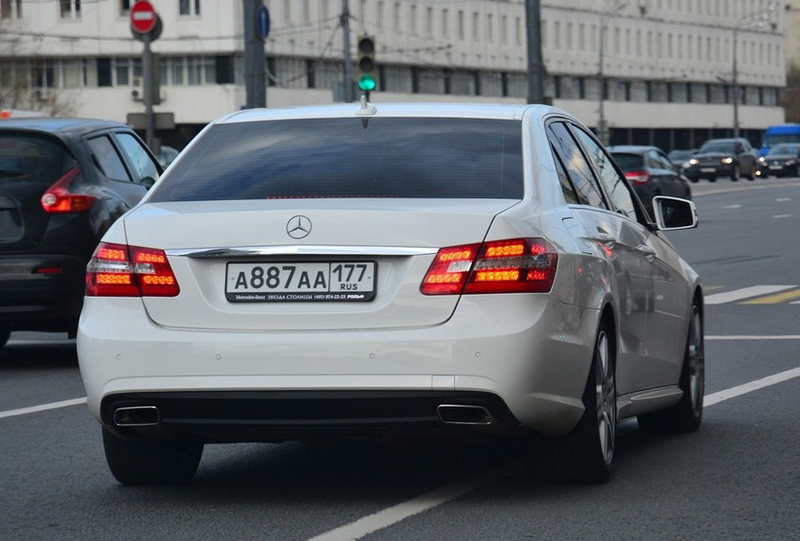

Original


In [12]:
# load the image and convert it to grayscale
# загружаем изображение и конвертируем его в оттенки серого
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image)
print('Original')

In [13]:
# construct a rectangular kernel and apply a blackhat operation which
# enables us to find dark regions on a light background
# создадим прямоугольное ядро 
# и применим операцию преобразования "Чёрная шляпа",
# которая позволяет нам находить темные области на светлом фоне
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

In [14]:
# similarly, a tophat (also called a "whitehat") operation will enable
# us to find light regions on a dark background
# аналогично, операция верхняя шляпа (также называемая "Белая шляпа")
# позволит нам найти светлые области на темном фоне.
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

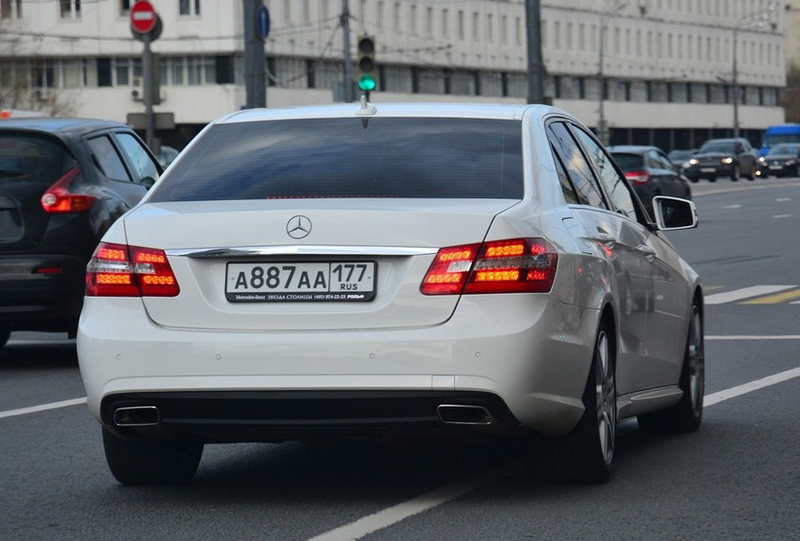

Original


In [15]:
# show the output images
# покажем получившиеся изображения
cv2_imshow(image)
print("Original")

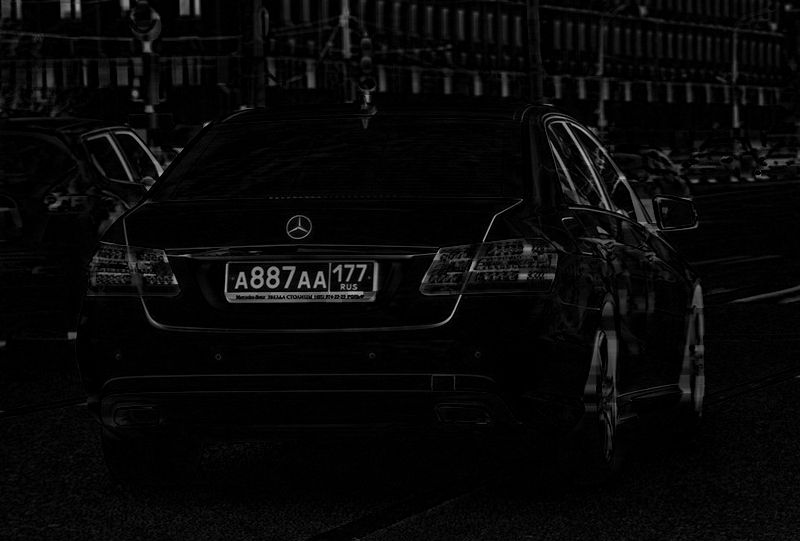

Blackhat


In [17]:
cv2_imshow(blackhat)
print("Blackhat")

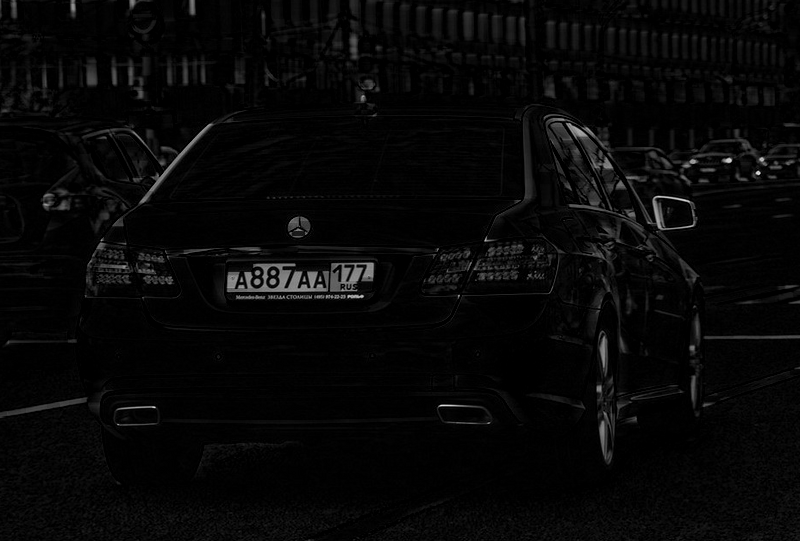

Tophat


In [18]:
cv2_imshow(tophat)
print("Tophat")